In [1]:
import os
import json
from Agent.utils import *
from Agent.data_agent import SalesDataAgent

agent = SalesDataAgent(
    provider="openai",
    model="gpt-4o-mini",
    temperature=0.1,
    max_tokens=16384,
    #enable_tracing=True,
    #phoenix_endpoint="http://localhost:6006/v1/traces",
    streaming=True,
)

CodeCarbon is available
<module 'langgraph.version' from 'c:\\Users\\Ossama\\Desktop\\DataAgent\\tesi\\lib\\site-packages\\langgraph\\version.py'>


In [5]:
result = agent.run(
    "Show me the sales in Nov 2021",
    visualization_goal="Sales trend for Nov 2021, with date as x and sales value as y",
    #best_of_n = 3
)

[Agent] Running best-of-1 with temperatures: [0.1]
Running the graph...
[LangGraph] Starting LangGraph execution
Tool selected: lookup_sales_data
Generated SQL Query:
 SELECT CAST(Sold_Date AS DATE) as Sale_Date, SUM(Total_Sale_Value) as Total_Sales_Value 
FROM sales 
WHERE CAST(Sold_Date AS VARCHAR) LIKE '%2021-11%' 
GROUP BY Sale_Date 
ORDER BY Sale_Date;
Tool selected: analyzing_data
Tool selected: create_visualization
Using DataFrame with shape: (29, 2), columns: ['Sale_Date', 'Total_Sales_Value']
This is the chart_config: {'chart_type': 'line', 'x_axis': 'Sale_Date', 'y_axis': 'Total_Sales_Value', 'title': 'Sales Trend for November 2021'}
Tool selected: end
[LangGraph] LangGraph execution completed
[0.0]


In [ ]:
print(type(result))
print(result)
# DV: the output shows that result is a tuple, because it is the return of data_agent.run_with_evaluation, that actually is (best_result, score_variance)

In [ ]:
# DV: we are interested in best_result, that is the first element of the tuple
print("Final tool:", result[0].get("tool_choice"))
print("Chart config:", result[0].get("chart_config"))
print("Answer steps:", len(result[0].get("answer", [])))

In [3]:
print("=== LAST ANSWER ===")
print(result[0]["answer"][-1])
print("===================")

=== LAST ANSWER ===
x_data = data_df[config['x_axis']]
y_data = data_df[config['y_axis']]

plt.plot(x_data, y_data, marker='o')
plt.xlabel(config['x_axis'])
plt.ylabel(config['y_axis'])
plt.title(config['title'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


=== CHART CODE ===
x_data = data_df[config['x_axis']]
y_data = data_df[config['y_axis']]

plt.plot(x_data, y_data, marker='o')
plt.xlabel(config['x_axis'])
plt.ylabel(config['y_axis'])
plt.title(config['title'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Executing chart with DataFrame shape: (29, 2)


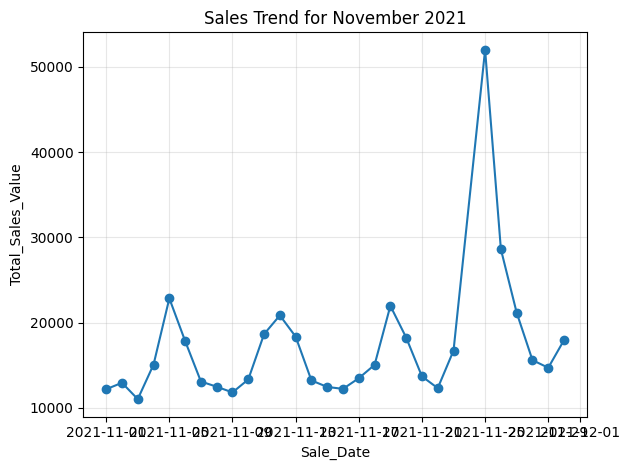

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the DataFrame directly from the result (no parsing needed!)
data_df = result[0].get("data_df")
chart_code = result[0]["answer"][-1]

print("=== CHART CODE ===")
print(chart_code)
print("==================\n")

# Execute the chart code with data_df in the namespace
if data_df is not None and chart_code:
    print(f"Executing chart with DataFrame shape: {data_df.shape}")
    
    namespace = {
        "data_df": data_df,
        "pd": pd,
        "plt": plt,
        "config": result[0].get("chart_config", {}),
        "__builtins__": __builtins__
    }
    
    exec(chart_code, namespace)
else:
    print("Warning: No DataFrame or chart code available")
